*In this project, how to perform Urban Sound Classification with deep learning is described. First, the general perspective of the project is presented, and then, (Data Set), the tools used and the results of the project are examined. All the codes used for this project are included in this section.*



# Overview of the sound classification project

Sound classification with deep learning and automatically is a growing field with numerous real-world applications. While much research has been done on audio files such as speech or music, work on ambient sound is relatively rare.

Likewise, seeing recent advances in image classification where Convolutional Neural Networks are used to classify images with high accuracy raises the question of whether these methods can be used in other fields such as classification. Sound is also used or not. There are many real-world applications for what is taught in this material, which are described below.

1. Content-based multimedia indexing and retrieval
2. Helping the deaf to do daily activities
3. Use in smart home applications such as 360 degree security and security features
4. Industrial uses such as predictive maintenance

# What is meant by audio data?

You are always in contact with sound, directly or indirectly. Your brain is constantly processing and understanding sound information and giving you information about the environment. A simple example would be the conversations you have with people on a daily basis. This talk is discussed by another person to continue the discussion. Even when you are thinking in a quiet environment, you tend to pick up very subtle sounds like rustling leaves or the sound of rain. This is the extent of your connection with sound.

And can you somehow get the floating sounds around you to do something useful? Yes of course! Devices have been developed to help capture these sounds and can display them in a computer-readable format. Examples of these formats are:

WAV (Waveform Audio File) format
MP3 (MPEG-1 Audio Layer 3) format
WMA (Windows Media Audio) format

# Audio processing applications
📌 Although we said that audio data can be useful for analysis, what are the potential applications of audio processing? Here we introduce some of them:

1. Indexing of music collections according to their audio characteristics
2. Music suggestion for radio channels
3. A similar search for audio files
4. Speech processing and synthesis - artificial voice generation for conversational agents

# Data collection
📌 For this problem, a dataset called Urbansound8K has been used. This dataset contains 8732 selected audio files (less than 4 seconds) of urban sounds from 10 classes, which are:

1. Air conditioner
2. Car horn
3. child's play
4. dog's bark
5. drilling
6. The sound of the car engine at rest
7. gun fire
8. Jackhammer (hand drill)
9. Siren
10. Street music

## Download the dataset from the following address:
https://urbansounddataset.weebly.com/urbansound8k.html

and using the UrbanSound8K.csv file in the data folder

# Importing the required libraries
📌 We'll start with importing required libraries.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Dataset

In [ ]:
data=pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")

In [ ]:
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
data["fold"].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

# Data Preprocessing

📌 Great! With this knowledge, we can adjust our dataset for further use.


In [ ]:
# import required libraries
from librosa import display
import librosa

In [ ]:
#preprocessing using entire feature set
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path="UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40,bins_per_octave=80).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40,bins_per_octave=80).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
    if(fold_no!='10'):
      x_train.append(features)
      y_train.append(label)
    else:
      x_test.append(features)
      y_test.append(label)

  0%|          | 0/8732 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1751
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=876
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=438
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=219
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=110
  n_fft, y.shape[-1]
  0%|          | 1/8732 [00:01<2:27:20,  1.01s/it]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input sig

In [ ]:
len(data)

8732

In [ ]:
#converting the lists into numpy arrays
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7895, 40, 5), (837, 40, 5), (7895,), (837,))

In [ ]:
#reshaping into 2d to save in csv format
x_train_2d=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test_2d=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
x_train_2d.shape,x_test_2d.shape

((7895, 200), (837, 200))

# Store Processed Data

In [ ]:
#saving the data numpy arrays
np.savetxt("train_data.csv", x_train_2d, delimiter=",")
np.savetxt("test_data.csv",x_test_2d,delimiter=",")
np.savetxt("train_labels.csv",y_train,delimiter=",")
np.savetxt("test_labels.csv",y_test,delimiter=",")

In [ ]:
#downloading the saved data from colab's server
from google.colab import files

files.download("train_data.csv")
files.download("test_data.csv")
files.download("train_labels.csv")
files.download("test_labels.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Urban Sound Classification - CNN Model

## Fetch Processed Data


In [ ]:
import numpy as np

In [ ]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
x_train = genfromtxt('train_data.csv', delimiter=',')
y_train = genfromtxt('train_labels.csv', delimiter=',')
x_test = genfromtxt('test_data.csv', delimiter=',')
y_test = genfromtxt('test_labels.csv', delimiter=',')

In [ ]:
#shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7895, 200), (837, 200), (7895,), (837,))

In [ ]:
#converting to one hot
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train.shape,y_test.shape

((7895, 10), (837, 10))

In [ ]:
#reshaping to 2D 
x_train=np.reshape(x_train,(x_train.shape[0], 40,5))
x_test=np.reshape(x_test,(x_test.shape[0], 40,5))
x_train.shape,x_test.shape

((7895, 40, 5), (837, 40, 5))

In [ ]:
#reshaping to shape required by CNN
x_train=np.reshape(x_train,(x_train.shape[0], 40,5,1))
x_test=np.reshape(x_test,(x_test.shape[0], 40,5,1))

In [ ]:
#shapes
x_train.shape,x_test.shape

((7895, 40, 5, 1), (837, 40, 5, 1))

## Build Model

In [ ]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [ ]:
#forming model
model=Sequential()

In [ ]:
#adding layers and forming the model
model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(40,5,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

In [ ]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

## Training

In [ ]:
#training the model
results = model.fit(x_train,y_train,batch_size=50,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
158/158 [==============================] - 25s 151ms/step - loss: 1.9553 - accuracy: 0.3156 - val_loss: 1.5604 - val_accuracy: 0.5078
Epoch 2/50
158/158 [==============================] - 24s 149ms/step - loss: 1.3970 - accuracy: 0.5135 - val_loss: 1.1960 - val_accuracy: 0.6344
Epoch 3/50
158/158 [==============================] - 24s 151ms/step - loss: 1.0804 - accuracy: 0.6308 - val_loss: 1.0341 - val_accuracy: 0.6583
Epoch 4/50
158/158 [==============================] - 24s 149ms/step - loss: 0.9128 - accuracy: 0.6890 - val_loss: 1.0308 - val_accuracy: 0.6619
Epoch 5/50
158/158 [==============================] - 24s 151ms/step - loss: 0.8427 - accuracy: 0.7173 - val_loss: 1.0838 - val_accuracy: 0.6858
Epoch 6/50
158/158 [==============================] - 24s 151ms/step - loss: 0.7258 - accuracy: 0.7640 - val_loss: 1.0594 - val_accuracy: 0.6535
Epoch 7/50
158/158 [==============================] - 23s 149ms/step - loss: 0.6493 - accuracy: 0.7913 - val_loss: 1.0177 - val_ac

In [ ]:
#train and test loss and scores respectively
train_loss_score=model.evaluate(x_train,y_train)
test_loss_score=model.evaluate(x_test,y_test)
print(train_loss_score)
print(test_loss_score)

27/27 [==============================] - 1s 22ms/step - loss: 1.5060 - accuracy: 0.6822
[0.048903968185186386, 0.9869537949562073]
[1.5059516429901123, 0.6821983456611633]


## Visualize the results


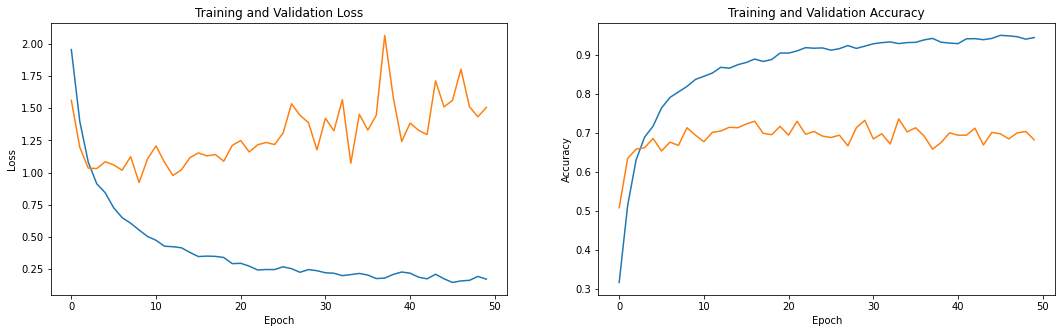

In [ ]:
fig = plt.figure(figsize=(18,5))
first_plot = fig.add_subplot(1,2,1)
#First plot
first_plot.plot(results.history["loss"],label="loss")
first_plot.plot(results.history["val_loss"],label="val_loss")
first_plot.set_xlabel("Epoch")
first_plot.set_ylabel("Loss")
first_plot.set_title("Training and Validation Loss")

#Second Plot
second_plot = fig.add_subplot(1,2,2)
second_plot.plot(results.history["accuracy"],label="accuracy")
second_plot.plot(results.history["val_accuracy"],label="val_accuracy")
second_plot.set_xlabel("Epoch")
second_plot.set_ylabel("Accuracy")
second_plot.set_title("Training and Validation Accuracy")

plt.show()